# Arpitha Gurumurthy
My first google colab for assignment 1 of 258 - Deep Learning

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.1MB/s 
     |████████████████████████████████| 194kB 16.7MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 1.2MB 22.5MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

# Deep Learning
It is a technique to collect and transform wide variety of data using multiple layers of neural networks. Every layer takes input from the previous layer and refines them. Different algorithms are used to train the layers to minimize the errors and improve the accuracy. Hence, the network learns to perform a specific task.
Deep Learning has a single type of model - neural network.

**Data**: Oxford-IIIT Pet Dataset containing 7,349 images of cats and dogs from 37 different breeds from the fast.ai datasets collection, and will then be extracted.

# **CNN_LEARNER for classification**
They have used a pretrained model that has already been trained on 1.3 million images, which will then be fine-tuned using transfer learning, to create a model that is specially customized for recognizing dogs and cats.

In [3]:
# importing all of the fastai.vision library
from fastai.vision.all import *
# downloading a dataset from the fast.ai datasets collection, extracting it, and returning a Path object with the extracted location
path = untar_data(URLs.PETS)/'images'

#defining a function, is_dog, labels dogs based on a filename rule provided by the dataset creators
def is_dog(x): return x[0].islower()
#function which tells fastai what kind of dataset we have, and how it is structured
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_dog, item_tfms=Resize(224)
)

#telling fastai to create a CNN and specifying what architecture to use (i.e. what kind of model), what data we want to train it on, and what metric to use
learn = cnn_learner(dls, resnet34, metrics=error_rate)
#telling fastai to fit the model
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.129050,0.026457,0.006089,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.059792,0.024068,0.004736,00:54


We see an error rate of less than 0.02 as describes in the  text book.

Uploading an image of a dog from the Google search images to check the model's accuracy.

In [9]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [12]:
image = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(image)
print(f"Is this a dog?: {is_dog}")
print(f"Probability that it is a dog: {probs[1].item():.6f}")

Is this a dog?: True
Probability that it is a dog: 0.999998


In [13]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [14]:
image = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(image)
print(f"Is this a dog?: {is_dog}")
print(f"Probability that it is a dog: {probs[1].item():.6f}")

Is this a dog?: False
Probability that it is a dog: 0.000000


# Machine Learning 
The above classifier is a deep learning model.
Machine learning is a way to get computers to perform a specific task.
Some important concepts can be summarized as follows:


*   The idea of weight assignment to maximize the performance
*   Every weight assignment has 'actual performance'.
*   Requirement for automatic means of testing that performance.
*   Need for a mechanism to improve the performance by changing the weights

# Neural Networks
They are a type of ML model which are extremely flexible because they can solve unusually wide range of problems by finding the correct weights. It is powerful because stochastic gradient descent provides us a way to find those weight values automatically.

# NOTE:
Validation Set: When we train a model, we must always have both a training set and a validation set, and must measure the accuracy of your model only on the validation set. If we train for too long, with not enough data, we will see the accuracy of your model start to get worse; this is called overfitting. fastai defaults valid_pct to 0.2, fastai will create a validation set by default.





# **UNET_LEARNER for segmentation**
Creating a model that can recognize the content of every individual pixel in an image is called segmentation.




In [16]:
# path = untar_data(URLs.PASCAL_2012)
# dls = SegmentationDataLoaders.from_label_func(
#     path, bs=8, fnames = get_image_files(path/"images"),
#     label_func = lambda o:path/'labels'/f'{o.stem}_P{o.suffix}',
#     codes = np.loadtxt(path/'codes.txt', dtype=str)
# )

# Fetching the dataset
path = untar_data(URLs.CAMVID_TINY)
# Trying to change the 'bs' value from 8 to 16, seemed to work faster
dls = SegmentationDataLoaders.from_label_func(
    path, bs=16, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
# Trying to see the behaviour of the model by setting fine_tune value to 8
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,4.238417,5.363769,00:01


epoch,train_loss,valid_loss,time
0,2.744295,2.403122,00:01
1,2.402077,1.946059,00:01
2,2.215212,1.923208,00:01
3,2.070211,1.574598,00:01
4,1.887707,1.308007,00:01
5,1.733016,1.199462,00:01
6,1.616166,1.132711,00:01
7,1.520943,1.129075,00:01


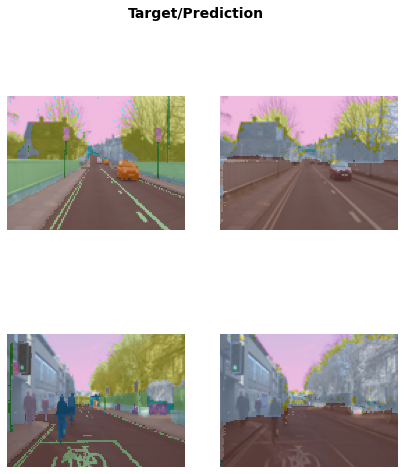

In [18]:
learn.show_results(max_n=6, figsize=(7,8))

The segmentation is much more accurate with fine_tune value set to 8. The trees, roads and building are also differentiated with different colour codes


In [19]:
# Fetching the dataset
path = untar_data(URLs.CAMVID_TINY)
# Trying to change the 'bs' value from 8 to 16, seemed to work faster
dls = SegmentationDataLoaders.from_label_func(
    path, bs=16, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
# Trying to see the behaviour of the model by changing the value of fine_tune from 8 to 1
learn.fine_tune(1)

epoch,train_loss,valid_loss,time
0,3.405019,2.924450,00:01


epoch,train_loss,valid_loss,time
0,3.272607,2.379088,00:01


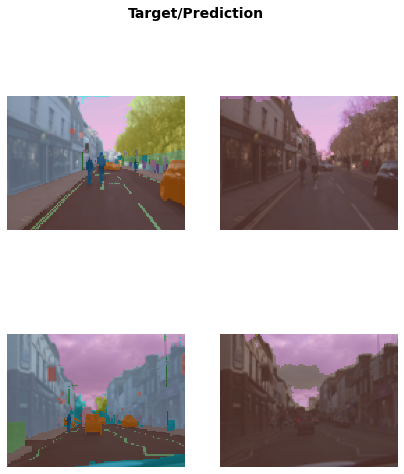

In [20]:
learn.show_results(max_n=6, figsize=(7,8))

We can see that the segmentation is not completely accurate on changing the fine_tune value to 1

# **text_classifier_learner for sentiment analysis**

In [21]:
from fastai.text.all import *

In [22]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.470911,0.404016,0.820200,04:21


epoch,train_loss,valid_loss,accuracy,time
0,0.328490,0.267682,0.884160,08:27
1,0.249597,0.209601,0.915560,08:27
2,0.177114,0.185498,0.928560,08:27
3,0.153576,0.188314,0.929320,08:28


In [23]:
learn.predict("I really liked that movie")

('pos', tensor(1), tensor([0.0045, 0.9955]))

The model has considered the review to be positive. The second part of the result is the index of "pos" in our data vocabulary and the last part is the probabilities attributed to each class (99.6% for "pos" and 0.4% for "neg")

In [24]:
learn.predict("I really did not like that movie")

('pos', tensor(1), tensor([0.2017, 0.7983]))

We can see that the positive probability is reducing here

In [25]:
learn.predict("I was not too fond of the movie")

('pos', tensor(1), tensor([0.1791, 0.8209]))

We can see that the positive probability is reducing here also.

In [26]:
learn.predict("I thought the movie was neutral")

('pos', tensor(1), tensor([0.1525, 0.8475]))

# **Tabular learner for decision tree**

In [27]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary", cat_names = ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race'],
cont_names = ['age', 'fnlwgt', 'education-num'], procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [28]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.362054,0.360978,0.835842,00:05
1,0.358699,0.348154,0.844134,00:05
2,0.347794,0.344276,0.845362,00:05


In [29]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,16.0,5.0,9.0,2.0,5.0,1.0,-1.361700,0.467563,-0.032131,0.0,0.0
1,5.0,12.0,3.0,4.0,1.0,5.0,1.0,-0.407776,-0.371551,-0.422506,0.0,0.0
2,5.0,1.0,1.0,9.0,3.0,5.0,1.0,0.986420,-0.162926,-1.593633,0.0,0.0
3,5.0,2.0,3.0,8.0,1.0,2.0,1.0,0.913041,0.489391,-1.203257,0.0,0.0
4,5.0,16.0,5.0,4.0,4.0,5.0,1.0,-1.068185,2.095479,-0.032131,0.0,0.0
5,5.0,10.0,5.0,8.0,2.0,5.0,1.0,-0.627912,0.006496,1.138996,0.0,0.0
6,1.0,4.0,5.0,1.0,4.0,2.0,1.0,-0.701291,0.633677,-3.155135,0.0,0.0
7,5.0,12.0,1.0,5.0,2.0,5.0,1.0,-0.554534,-1.480849,-0.422506,0.0,0.0
8,5.0,12.0,5.0,4.0,4.0,5.0,1.0,-1.214943,1.111207,-0.422506,0.0,0.0


# **Collab learner for ranking**

In [30]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.514018,1.422754,00:00


epoch,train_loss,valid_loss,time
0,1.378391,1.366065,00:00
1,1.272844,1.190355,00:00
2,1.040141,0.877727,00:00
3,0.813626,0.724266,00:00
4,0.703279,0.684694,00:00
5,0.653920,0.671332,00:00
6,0.627556,0.666310,00:00
7,0.610594,0.663113,00:00
8,0.609234,0.662285,00:00
9,0.592707,0.662175,00:00


In [31]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,86.0,20.0,3.5,3.796695
1,22.0,49.0,2.5,3.641005
2,99.0,38.0,4.5,4.336556
3,21.0,57.0,3.5,3.804449
4,45.0,35.0,5.0,3.274884
5,53.0,69.0,4.5,4.432514
6,84.0,60.0,4.0,3.698726
7,94.0,1.0,4.0,3.851679
8,38.0,22.0,4.0,4.064242
